# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

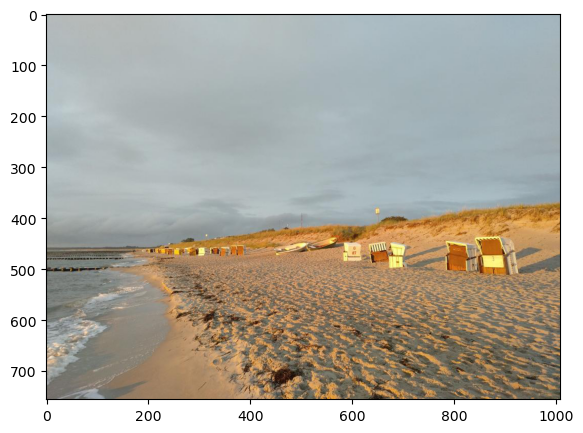

In [2]:
img = cv2.imread('sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1670505d0>)

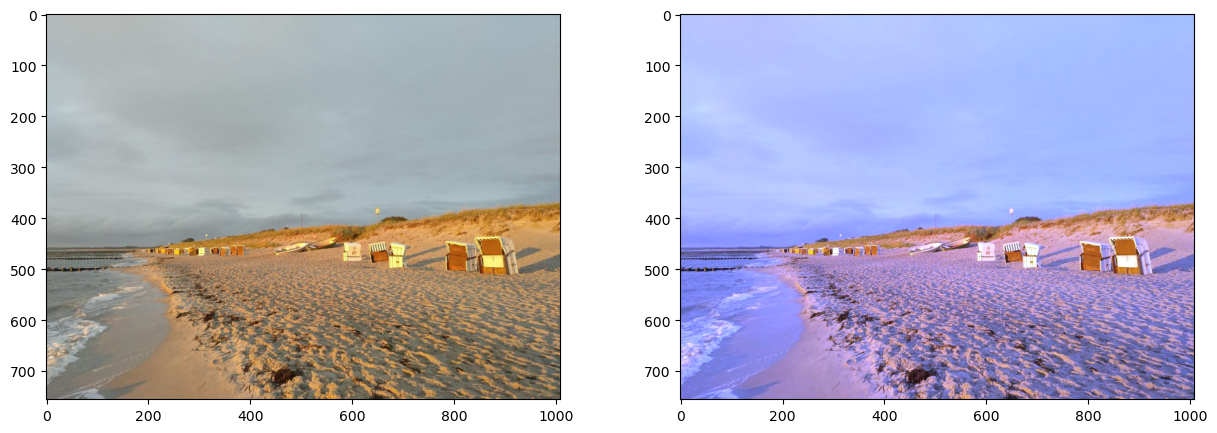

In [3]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

Updated Mean R: 154.38437080078947
Updated Mean G: 154.38437080078947
Updated Mean B: 154.38437080078947


(<Axes: >, <matplotlib.image.AxesImage at 0x13b9d9890>)

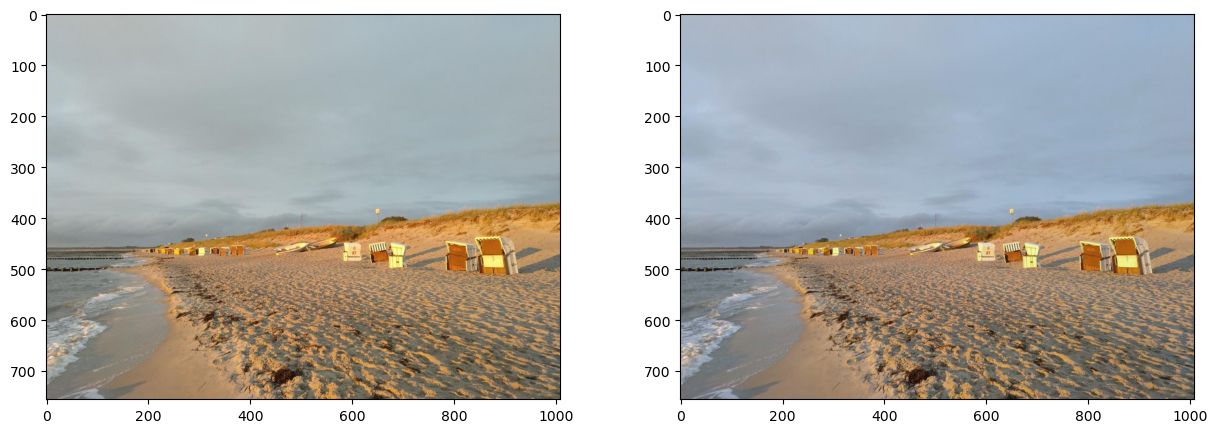

In [24]:
# Load your image
img = cv2.imread('sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

mean_overall = (mean_r + mean_g + mean_b) / 3

kr = mean_overall / mean_r
kg = mean_overall / mean_g
kb = mean_overall / mean_b

# Apply color balancing and generate the balanced image
balanced = img.copy()
balanced[:, :, 0] = img[:, :, 0] * kr
balanced[:, :, 1] = img[:, :, 1] * kg
balanced[:, :, 2] = img[:, :, 2] * kb

# Checking gray world algorithm equation
updated_mean_r = mean_r * kr
updated_mean_g = mean_g * kg
updated_mean_b = mean_b * kb

print("Updated Mean R:", updated_mean_r)
print("Updated Mean G:", updated_mean_g)
print("Updated Mean B:", updated_mean_b)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x13fd15550>)

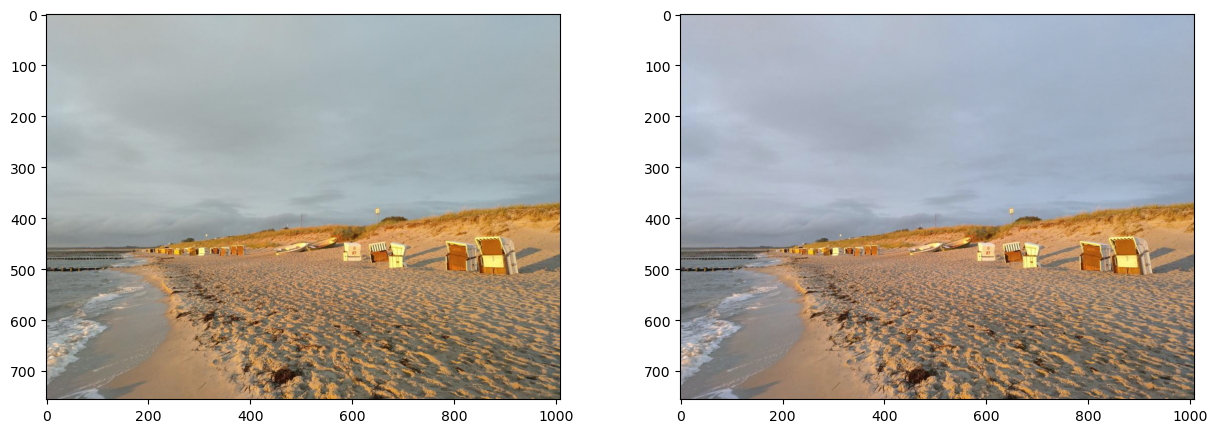

In [40]:
# Load your image
img = cv2.imread('sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r_channel = img[:, :, 0]
g_channel = img[:, :, 1]
b_channel = img[:, :, 2]

# Compute the maximum values for each channel
max_r = np.max(r_channel)
max_g = np.max(g_channel)
max_b = np.max(b_channel)

# Normalize each channel by its maximum value
normalized_r_channel = r_channel / max_r
normalized_g_channel = g_channel / max_g
normalized_b_channel = b_channel / max_b

# Apply scale-by-max balancing and generate the balanced image
balanced = img.copy()
# tried to multiply matrix like this: balanced[:, :, 0] = img[:, :, 0] * normalized_red_channel
# but it gives a wrongly balanced image, so I found a solution using np.stack, and it gives the balanced image
balanced = np.stack((normalized_r_channel, normalized_g_channel, normalized_b_channel), axis=-1)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)